In [14]:
from glob import glob
import os.path as osp
from pathlib import Path
import shutil

pattern = 'selfi4id/*/*/Selfie*.jpg'
files = glob(pattern)
exoprt_dir = 'data'
for img in files:
    dir_name = osp.dirname(img)
    id_, _, age, _, name = str(Path(dir_name).stem).split("_")
    _, idx = str(Path(img).stem).split("_")
    file_name = f'Selfie_{name}_age_{age}_{idx}.jpg'
    dst = osp.join(exoprt_dir, file_name)
    shutil.copyfile(img, dst)




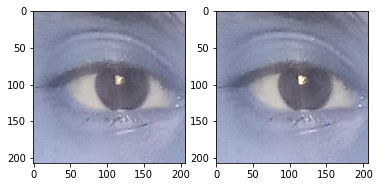

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
img_path = 'out/Selfie_Alejandra_age_32_1_part_0.jpg'
img = cv2.imread("out/Selfie_Alejandra_age_32_1_part_0.jpg")
mask = np.zeros_like(img[...,0], dtype=np.uint8)
mask[(img[...,0] >  230) & (img[...,1] >  230) & (img[...,2]>  230)] = 255
dst = cv2.inpaint(img,mask,3,cv2.INPAINT_TELEA)
fig, axes = plt.subplots(1,2)

axes[0].imshow(dst)
axes[1].imshow(img)



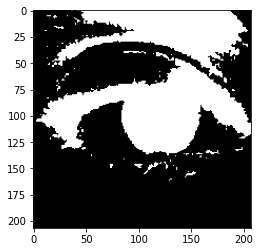

In [25]:
import numpy as np
import cv2 as cv
from skimage import morphology

Z = img.reshape((-1,3))
# convert to np.float32
Z = np.float32(Z)
# define criteria, number of clusters(K) and apply kmeans()
criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 10, 1.0)
K = 2
ret,label,center=cv.kmeans(Z,K,None,criteria,10,cv.KMEANS_RANDOM_CENTERS)
# Now convert back into uint8, and make original image
center = np.uint8(center)
# res = center[label.flatten()]
res2 = (label.reshape((img.shape[0], img.shape[1])) == 1).astype(np.uint8) 

# Copy the thresholded image.
im_floodfill = res2.copy()
# Mask used to flood filling.
# Notice the size needs to be 2 pixels than the image.
h, w = res2.shape[:2]
mask = np.zeros((h+2, w+2), np.uint8)
# Floodfill from point (0, 0)
cv2.floodFill(im_floodfill, mask, (0,0), 255)
# Invert floodfilled image
im_floodfill_inv = cv2.bitwise_not(im_floodfill)
# Combine the two images to get the foreground.
im_out = res2 | im_floodfill_inv
allpoints = np.argwhere(im_out==255)

plt.imshow(im_out, cmap='gray')


In [2]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
img = cv.imread('gt/Selfie_Alejandra_age_32_1.jpg')
mask = np.zeros(img.shape[:2],np.uint8)
bgdModel = np.zeros((1,65),np.float64)
fgdModel = np.zeros((1,65),np.float64)
rect = (50,50,450,290)
cv.grabCut(img,mask,rect,bgdModel,fgdModel,5,cv.GC_INIT_WITH_RECT)
mask2 = np.where((mask==2)|(mask==0),0,1).astype('uint8')
img = img*mask2[:,:,np.newaxis]

In [41]:
allpoints.shape

(14334, 2)

In [47]:
a.shape[0]//9

873

In [40]:
allpoints

array([[  0,  36],
       [  0,  37],
       [  0,  42],
       ...,
       [160, 130],
       [160, 131],
       [161, 129]])